# Bike Sharing Analysis with Ford GoBike Data

## by Huizi Shao

## Preliminary Wrangling

> Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013.In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. [@https://en.wikipedia.org/wiki/Bay_Wheels]

> This document explores a dataset containing the information about the bike sharing system in SF, Oakland and San Jose, which in total 1.33 GB. 

> Ford goBike Data is available in this link: <a href="https://s3.amazonaws.com/fordgobike-data/index.html">Ford goBike Data</a>




## Table of content
- Prepare the dataset
- Save and simple Data Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from requests import get
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

### Prepare the dataset

In [14]:
folder_name_of_csvs = 'trip_data_files'

In [ ]:
#load 2017 data
makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))

In [17]:
#load 2018 data
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [19]:
#load 2019 first part data
for month in range(1,5):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [21]:
#load 2019 second part data
for month in range(5,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2019' + month_leading_zero + '-baywheels-tripdata.csv.zip'
    response = get(bike_data_url)

    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [22]:
#load 2020 data
for month in range(1,7):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2020' + month_leading_zero + '-baywheels-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

### Combine the datasets into one

In [31]:
dirpath = getcwd()
print("current directory is : " + dirpath)

current directory is : /Users/huizishao/Desktop/online class/Become a data analyst/visualization/project


In [38]:
import glob

path = getcwd()

all_files = glob.glob(path + "/trip_data_files/*.csv")
#print(all_files)
li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)
    #print(filename)

frame = pd.concat(li, axis=0, ignore_index=True)

In [37]:
frame.to_csv('data',index = False)

### Dataset
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Birth year of the member    
- Gender of the member           
- Bike share for all trip (Yes/No)


In [3]:
df_default = pd.read_csv('data')

A lot of data is null and contain ambiguous infomation because of the columns as follows, they are decided to be deleted for further analyzing
- started_at               object 
- ended_at                 object 
- start_lat                float64
- start_lng                float64
- end_lat                  float64
- end_lng                  float64
- ride_id                  object 
- rideable_type            object 
- member_casual            object 
- is_equity                object 
- Unnamed: 0               float64
- rental_access_method     object


In [4]:
sum(df_default.rental_access_method.isnull())

5437393

In [5]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176089 entries, 0 to 6176088
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  Unnamed: 0               float64
 17  rental_access_method     object 
 18  ride_id                  object 
 19  rideable_type            object 
 20  started_at               object 
 21  ended_at

In [6]:
#save the new dataset into df
df = df_default.drop(['started_at','ended_at','start_lat','start_lng','end_lat','end_lng','ride_id',
                     'rideable_type','member_casual','is_equity','Unnamed: 0','rental_access_method'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176089 entries, 0 to 6176088
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(9), object(7)
memory usage: 753.9+ MB


In [8]:
df.isnull().sum()

duration_sec                380678
start_time                  380678
end_time                    380678
start_station_id            719516
start_station_name          717682
start_station_latitude      380678
start_station_longitude     380678
end_station_id              727345
end_station_name            725519
end_station_latitude        380678
end_station_longitude       380678
bike_id                     380678
user_type                   380678
member_birth_year          3139930
member_gender              3139497
bike_share_for_all_trip    2048644
dtype: int64

In [9]:
df.shape

(6176089, 16)

In [10]:
df.to_csv('data_1.csv', index = False)

In [2]:
#df = pd.read_csv('data_1.csv')

In [3]:
df['start_time'] = pd.to_datetime(df['start_time']) 
df['end_time'] = pd.to_datetime(df['end_time']) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176089 entries, 0 to 6176088
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(9), object(5)
memory usage: 753.9+ MB


In [4]:
df_copy = df

In [5]:
df_copy[df_copy.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3104025,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104027,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104029,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104030,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104033,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525876,2101.0,2020-03-01 15:34:57,2020-03-01 16:09:59,NaN,NaN,37.809066,-122.474850,NaN,NaN,37.805210,-122.433920,326439.0,Subscriber,NaN,NaN,NaN
5525877,2205.0,2020-03-01 15:36:34,2020-03-01 16:13:19,NaN,NaN,37.809074,-122.474918,NaN,NaN,37.805186,-122.433564,232967.0,Customer,NaN,NaN,NaN
5525878,2035.0,2020-03-01 15:36:28,2020-03-01 16:10:23,NaN,NaN,37.809100,-122.474939,NaN,NaN,37.805173,-122.433598,474460.0,Customer,NaN,NaN,NaN
5525881,1183.0,2020-03-01 12:26:56,2020-03-01 12:46:40,NaN,NaN,37.809138,-122.415689,NaN,NaN,37.806195,-122.405260,866334.0,Customer,NaN,NaN,NaN


In [6]:
df_copy = df_copy.drop_duplicates()

In [16]:
# with 0 null in member_birth_year is weired, maybe becasue of becoming 'nan', double check in next cell
df_copy.isnull().sum()

duration_sec                 34982
start_time                   34982
end_time                     34982
start_station_id            572767
start_station_name          570933
start_station_latitude       34982
start_station_longitude      34982
end_station_id              574498
end_station_name            572672
end_station_latitude         34982
end_station_longitude        34982
bike_id                      34982
user_type                    34982
member_birth_year          2786722
member_gender              2786289
bike_share_for_all_trip    1695436
dtype: int64

In [17]:
#df_copy.query('member_birth_year == "nan"')

In [18]:
#replace string 'nan' to np.nan
#df_copy.replace('nan', np.nan, inplace=True) 

In [7]:
df_copy.isnull().sum()

duration_sec                 34982
start_time                   34982
end_time                     34982
start_station_id            572767
start_station_name          570933
start_station_latitude       34982
start_station_longitude      34982
end_station_id              574498
end_station_name            572672
end_station_latitude         34982
end_station_longitude        34982
bike_id                      34982
user_type                    34982
member_birth_year          2786722
member_gender              2786289
bike_share_for_all_trip    1695436
dtype: int64

### Data structure
- The data is 2805001 rows and 20 columns after the wrangling in the end. 

### We focus on gaining insights for the following questions of interest :
- The duration distritbuion
- Member gender distritbution
- Member Age distritbution
- The relationship between duration and user age
- The relationship between duration and user type
- The relationship between user type and gender
- The relationship between duration, month and usage count
- The relationship between use type, month and usage count
- etc

### The following features I think will help support my investigation into feature(s) of interest :
- member_birth_year
- member_gender
- user_type
- duration_sec
- start_time

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration (#quantatative)

In [8]:
df_copy['duration_min'] = df_copy['duration_sec'] / 60

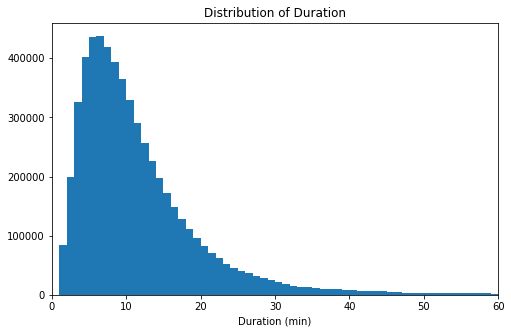

In [21]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, df_copy['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_min', bins = bins)

plt.xlim(0,60)
plt.xlabel('Duration (min)')
#plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

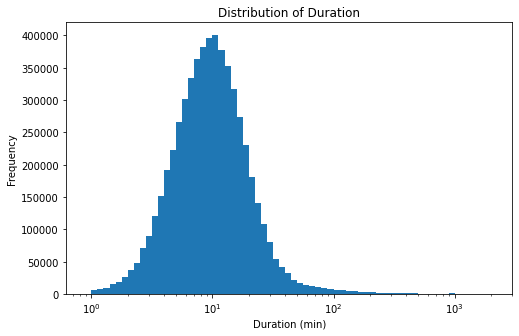

In [22]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_copy['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlim(0,3000)
plt.xticks([1 , 10, 100, 1000])
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show();

- Duration(min) has a long-tailed distribution/ Right-skewed, with a lot of diamonds on the low duration end, and few on the high duration end. 
- When plotted on a log-scale, the duration distribution looks normal, with mean around 10 min.

Next up, the predictor variable of interest: gender (#qualitative)

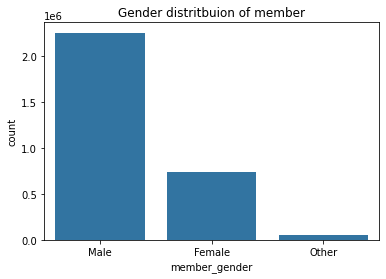

In [9]:
default_color = sb.color_palette()[0]

sb.countplot(data=df_copy,x='member_gender',color = default_color)
plt.title('Gender distritbuion of member');

- The majority of the member is male, which about two times of the number of female member users

> Next up, the predictor variable of interest: member_birth_year (age) (#quantatative)

In [24]:
df_copy.member_birth_year.value_counts()

1988.0    174820
1987.0    148691
1989.0    148213
1990.0    141104
1985.0    136066
           ...  
1886.0         3
1906.0         2
1930.0         2
1903.0         1
1910.0         1
Name: member_birth_year, Length: 93, dtype: int64

In [10]:
df_copy['age_member'] = 2020 - df_copy['member_birth_year']

In [26]:
df_copy.age_member.describe(percentiles = [.6, .7, .75, .8, .9, .95])

count    3.036159e+06
mean     3.686325e+01
std      1.043760e+01
min      1.900000e+01
50%      3.500000e+01
60%      3.700000e+01
70%      4.000000e+01
75%      4.200000e+01
80%      4.500000e+01
90%      5.200000e+01
95%      5.700000e+01
max      1.420000e+02
Name: age_member, dtype: float64

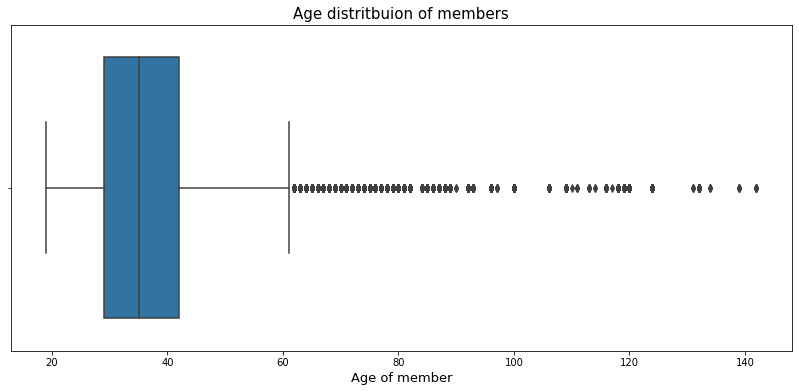

In [27]:
plt.figure(figsize=(14,6))
sb.boxplot(data=df_copy, x='age_member', color = default_color, orient='h')
plt.xlabel('Age of member', fontsize=13)
plt.title('Age distritbuion of members', fontsize=15);

- From the percetile analyzing, age from 19 to 56 takes 95% of the users
- From the boxplot, we can find a lot of outlinears above 60 years old
- It covers much percentiles and seems not safe and possible for users above 60 use bike sharing
- Decide to remfor further analyzing

In [11]:
df_copy = df_copy[df_copy['age_member'] <= 60]

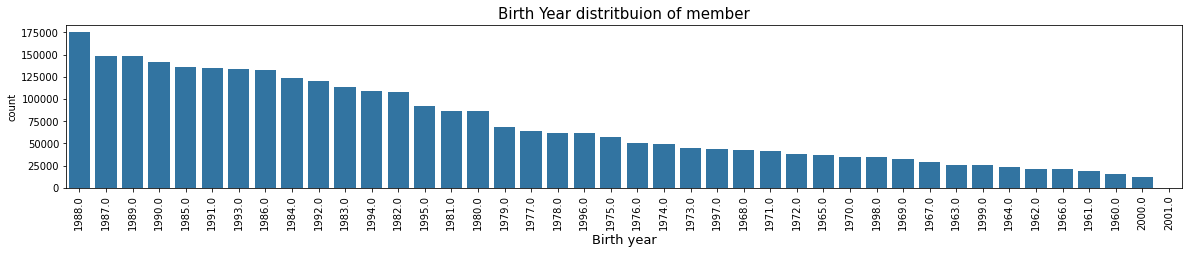

In [29]:
birth_order= df_copy.member_birth_year.value_counts().index

plt.figure(figsize=(20, 3))
sb.countplot(data=df_copy,x='member_birth_year',order = birth_order, color = default_color)
plt.title('Birth Year distritbuion of member',fontsize=15)
plt.xlabel('Birth year', fontsize=13)
plt.xticks(rotation = 90);

In [30]:
age_order= df_copy.age_member.value_counts().index

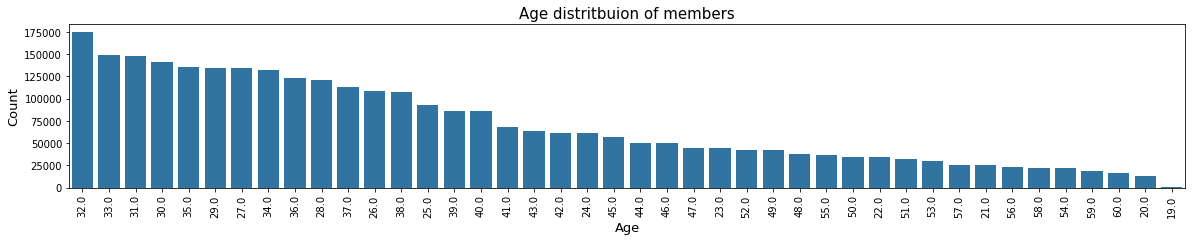

In [31]:
plt.figure(figsize=(20, 3))

age_order = df_copy.age_member.value_counts().index
sb.countplot(data=df_copy,x ='age_member', order = age_order, color = default_color)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Age distritbuion of members',fontsize=15)
plt.xticks(rotation = 90);

> Group ages to further analyzing

In [32]:
age_idx = df_copy.age_member.value_counts().index

In [33]:
age_count = df_copy.age_member.value_counts().values

In [34]:
age_list = df_copy.age_member.value_counts().index

from collections import defaultdict
ages = defaultdict(int)

for i in range(len(age_idx)):
    if age_idx[i] > 50:
        ages['50-60'] += age_count[i]
    elif age_idx[i] > 40:
        ages['40-50'] += age_count[i]
    elif age_idx[i] > 30:
        ages['30-40'] += age_count[i]
    elif age_idx[i] > 20:
        ages['20-30'] += age_count[i]
    elif age_idx[i] > 10:
        ages['10-20'] += age_count[i]     

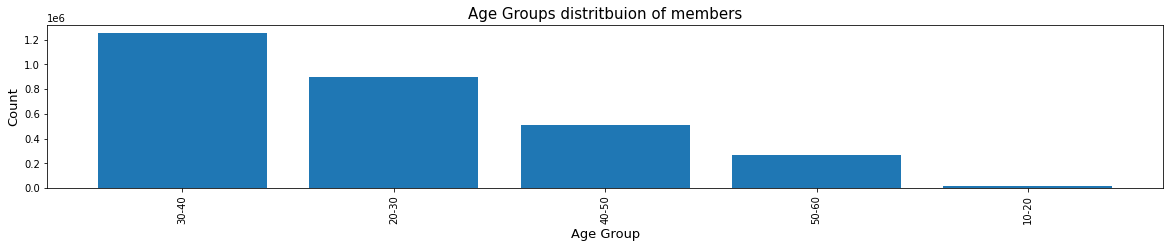

In [35]:
plt.figure(figsize=(20, 3))

keys = ages.keys()
values = ages.values()
plt.bar(keys, values)
plt.xticks(rotation = 90)
plt.xlabel('Age Group',fontsize =13)
plt.ylabel('Count',fontsize =13)
plt.title('Age Groups distritbuion of members', fontsize =15);

- Speperate the age into 5 groups to further analyzing the users
- Most of the member users are around 30 to 40 years old, Then 20-30 years old

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal, with mean around 10min.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
When investigating the member_birth_year variable, a number of outlier points were identified. Overall, therese points can be characterized by an unlogical values, and removed from the datasets.It also be transformed to age and seperate into age groups for better visulize and understanding for audience.

## Bivariate Exploration

> To start off with, I want to look at the correlations present between age and duration_min

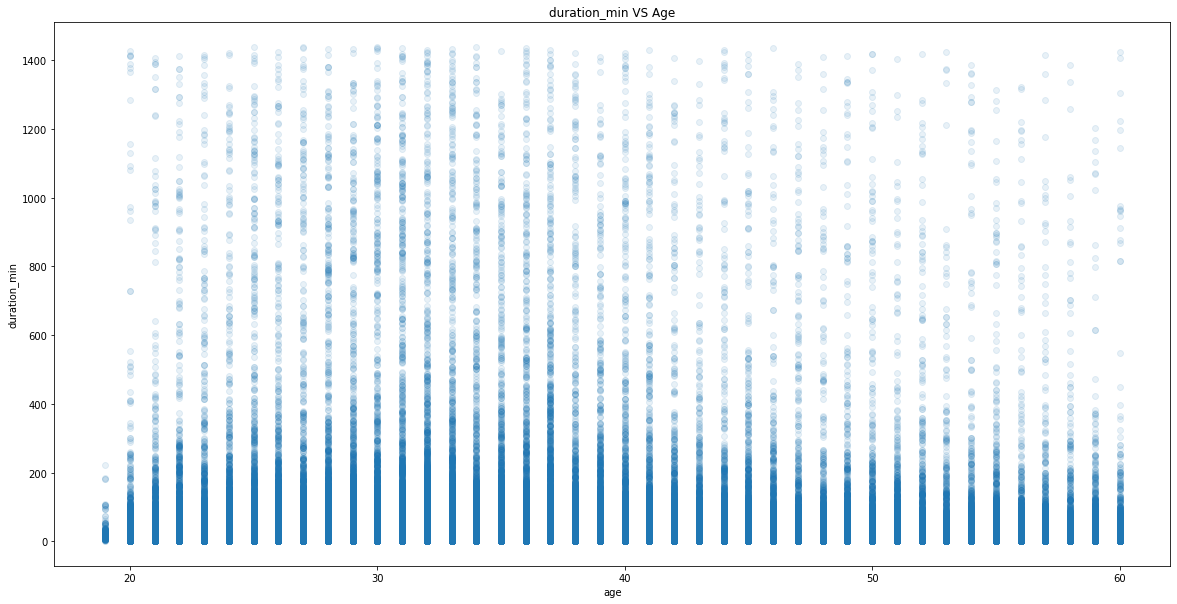

In [36]:
plt.figure(figsize =(20, 10))

plt.scatter(data = df_copy, x = 'age_member', y = 'duration_min', alpha = 1/10)
#plt.xlim(0,2)
plt.xlabel('age')
plt.ylabel('duration_min')
plt.title('duration_min VS Age');

- People in general use the bike sharing in short time period
- Not clear relationship between two

> Let's move on to looking at the relationship between 2 categorical variable: member_gender, user_type

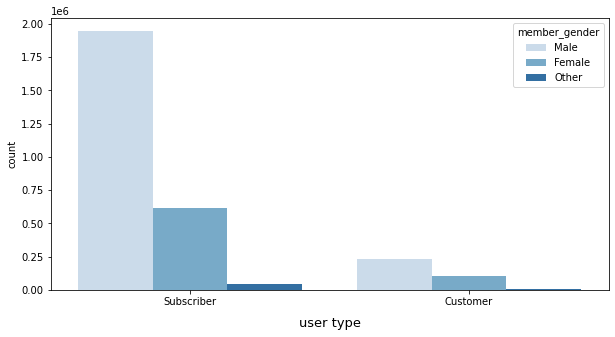

In [37]:
plt.figure(figsize =(10, 5))

sb.countplot(data = df_copy, x = 'user_type', hue = 'member_gender', palette = 'Blues')
plt.xlabel('user type', labelpad=10, fontsize = 13);


- The male dominate the market for bike sharing, especially for suscribers

> Let's move on to looking at the relationship between duration of riding and the user type

In [38]:
user_type_riding = df_copy.groupby('user_type')['duration_min'].mean()

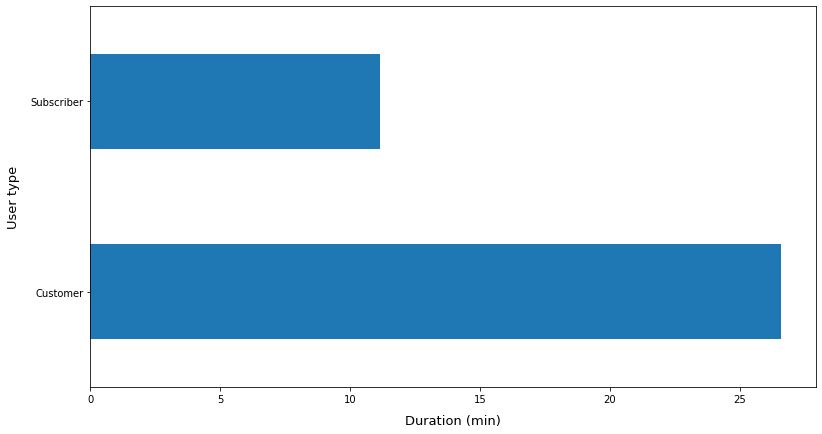

In [39]:
user_type_riding.plot(kind='barh', color = default_color, figsize=(13,7))
plt.xlabel('Duration (min)', labelpad=10, fontsize = 13)
plt.ylabel('User type', labelpad=10, fontsize = 13);

- On average, the customers ride longer than the subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is no significant correlation between age and the duration of the riding. However, male dominate the market, for both suscribers and the customers. In general, customers ride longer than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There might be some interesting relationship between duration of riding, the number of riding and the start time. We expect some weather factors influence the riding. This will have to be explored further in the next section.

## Multivariate Exploration

> Firstly, I want to look at the relationship between bike using month, duration_min, and usage count

In [12]:
df_copy['month_start'] = pd.DatetimeIndex(df_copy['start_time']).month
df_copy['month_start'].value_counts()

4     340646
3     337870
10    279299
2     265545
1     261192
9     253965
8     242846
7     215787
11    208089
12    197590
6     179894
5     161807
Name: month_start, dtype: int64

In [41]:
df_copy.duration_min.value_counts()

5.900000       4115
6.200000       4103
6.100000       4092
6.466667       4092
5.450000       4085
               ... 
322.016667        1
322.766667        1
1170.100000       1
894.366667        1
218.650000        1
Name: duration_min, Length: 17014, dtype: int64

In [42]:
df_copy.duration_min.describe([.6, .7, .75, .8, .9, .95])

count    2.944530e+06
mean     1.293953e+01
std      3.359656e+01
min      1.016667e+00
50%      9.016667e+00
60%      1.061667e+01
70%      1.265000e+01
75%      1.393333e+01
80%      1.550000e+01
90%      2.078333e+01
95%      2.741667e+01
max      1.438017e+03
Name: duration_min, dtype: float64

In [13]:
df_copy = df_copy[df_copy['duration_min'] <= 28]

In [14]:
df_copy.month_start.value_counts()

4     324365
3     321205
10    267212
2     255482
1     250566
9     240032
8     230357
7     202799
11    200075
12    188659
6     170130
5     154119
Name: month_start, dtype: int64

In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805001 entries, 0 to 6176088
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  duration_min             float64       
 17  age_member               fl

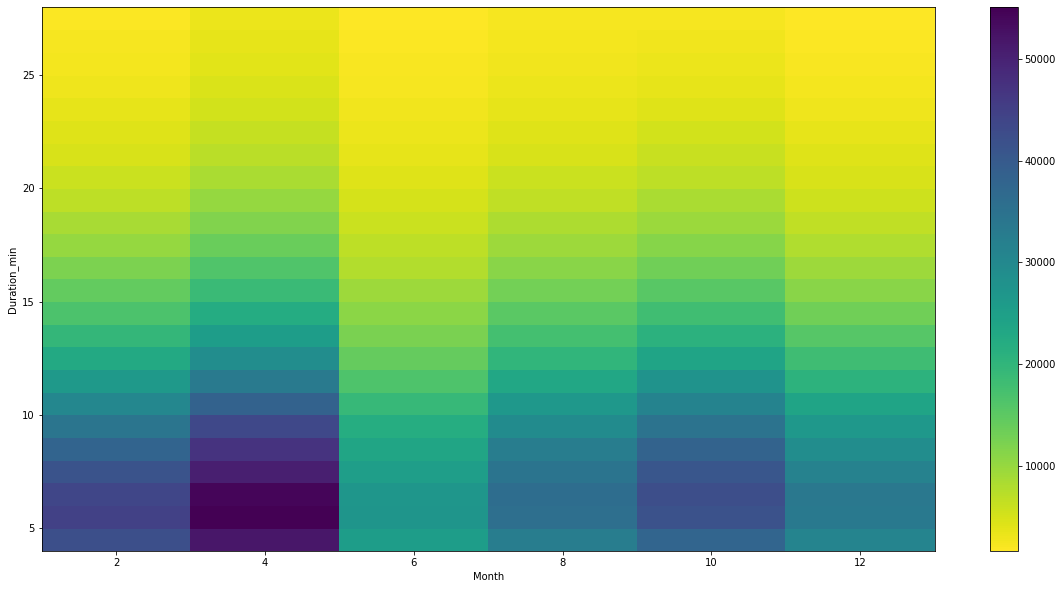

In [46]:
plt.figure(figsize =(20, 10))

bins_x = np.arange(1, df_copy['month_start'].max()+2, 2)
bins_y = np.arange(4, df_copy['duration_min'].max()+1, 1)
plt.hist2d(data = df_copy, x = 'month_start', y = 'duration_min', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Month')
plt.ylabel('Duration_min');

- Users get ride more in April, and the duration of riding is longer
- October and Febrary is also a popular month for riding the bike based on the data
- As we expected, winter(12,1) and summer(6,7,8), there is not much riding and shorter maybe because of weather

> Let's move on to looking at the trend of the martket growing based on month for both suscribers and customers

- Rename the start date to make the time month based (.dt.strftime('%y' + '-' + '%m'))

In [33]:
df_copy['start_time_month'] = df_copy['start_time'].dt.strftime('%y' + '-' + '%m')
df_copy.start_time_month.value_counts().index

Index(['19-03', '19-04', '18-10', '18-07', '19-01', '18-06', '18-08', '19-02',
       '18-09', '18-05', '18-11', '18-12', '18-04', '18-03', '18-02', '17-10',
       '18-01', '17-11', '17-09', '17-12', '17-08', '17-07', '17-06'],
      dtype='object')

In [16]:
#df_copy['useage_count'] = df_copy.groupby('start_time_month').count()['bike_id']
#useage_count = df_copy.groupby('start_time_month').count()['bike_id'].values
#useage_count

array([  2156,  32217,  63275,  78084,  87832,  79574,  72007,  80552,
        91303,  95042, 112705, 154119, 167974, 170582, 167082, 161948,
       179380, 120501, 116652, 170014, 164179, 226163, 211660])

In [31]:
#transform subset in the df_copy into new series and to df w/ adding index
month_user_type = df_copy.groupby(['start_time_month','user_type']).size().reset_index()
month_user_type

,start_time_month,user_type,0
0,17-06,Customer,105
1,17-06,Subscriber,2051
2,17-07,Customer,3580
3,17-07,Subscriber,28637
4,17-08,Customer,7098
5,17-08,Subscriber,56177
6,17-09,Customer,9055
7,17-09,Subscriber,69029
8,17-10,Customer,7488
9,17-10,Subscriber,80344


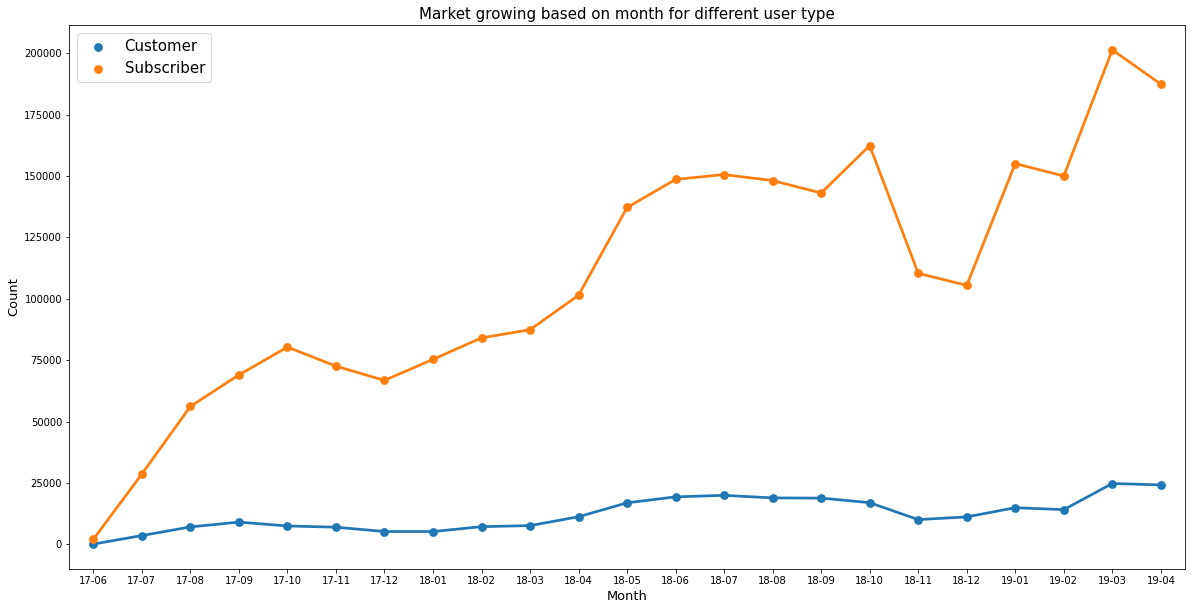

In [40]:
plt.figure(figsize =(20, 10))

sb.pointplot(data = month_user_type, x='start_time_month', y=0, hue ='user_type', scale =1)
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Market growing based on month for different user type',fontsize = 15)
plt.legend(prop={'size': 15} ,loc='upper left');

- Bike sharing market growing quickly from 17-06 to 19-04
- Suscribers grew really fast in general, customers stay the similat fluctuation
- Interestingly, for suscribers, there is a big drop between 18-11 and 18-12, and spikes afterwards, it might need further investigation

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of user type related to month usage in this section. The multivariate exploration here showed that with suscribers market growing quickly in terms of month, but customers market stay the same. There are some clear drop and spike happened for some months that are interesting to see the factors in the future.


### Were there any interesting or surprising interactions between features?

> Month(season) influences the biking usage count and the duration of the using as we expected. But superisingly, the relationship is not that clear. We might need to seperate the location for further investigation.


In [37]:
df_copy.to_csv('df_copy.csv', index=False)